In [2]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# Create a simple neural network
model = Sequential()
model.add(Dense(128, input_dim=784, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

Epoch 1/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2589 - accuracy: 0.9246 - val_loss: 0.1093 - val_accuracy: 0.9662
Epoch 2/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1085 - accuracy: 0.9664 - val_loss: 0.0943 - val_accuracy: 0.9712
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0767 - accuracy: 0.9754 - val_loss: 0.0792 - val_accuracy: 0.9775
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0570 - accuracy: 0.9816 - val_loss: 0.0901 - val_accuracy: 0.9747
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0447 - accuracy: 0.9852 - val_loss: 0.0843 - val_accuracy: 0.9772
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0367 - accuracy: 0.9883 - val_loss: 0.0842 - val_accuracy: 0.9788
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0326 - accuracy: 0.9894 - val_loss: 0.0733 - val_accuracy

In [4]:
# Save the model to .h5 file
model.save('mnist_model.h5')
print("Model saved to mnist_model.h5")

Model saved to mnist_model.h5


In [11]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import load_model

# Load MNIST dataset
_, (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

# Load the saved model
model = load_model('mnist_model.h5')

# Make predictions on new data
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compare predicted labels with true labels
correct_predictions = np.sum(predicted_labels == y_test)
total_samples = len(y_test)
accuracy = correct_predictions / total_samples

print(f'Test accuracy: {accuracy}')

313/313 [==============================] - 1s 2ms/step
Test accuracy: 0.9758


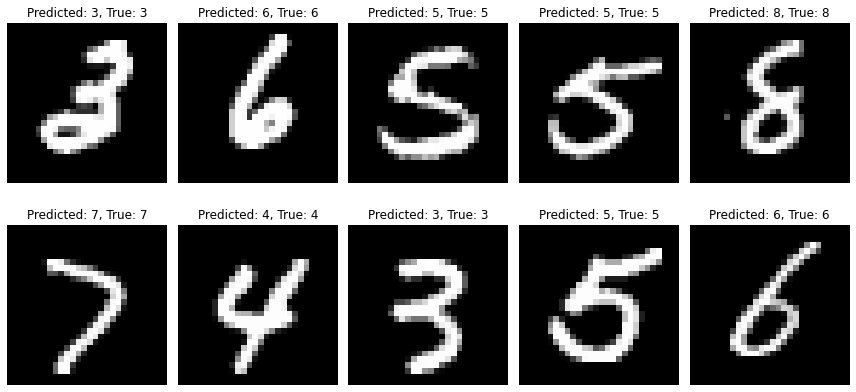

In [12]:
import matplotlib.pyplot as plt
# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Select a few random samples to visualize
num_samples_to_visualize = 10
random_indices = np.random.choice(X_test.shape[0], num_samples_to_visualize, replace=False)

# Plot the predictions and corresponding images
plt.figure(figsize=(12, 6))
for i, index in enumerate(random_indices):
    plt.subplot(2, num_samples_to_visualize // 2, i + 1)
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_labels[index]}, True: {y_test[index]}')
    plt.axis('off')

plt.tight_layout()
plt.show()